importing libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

%autosave 1

Autosaving every 1 seconds


In [16]:
data_1 = pd.read_csv("data_1.csv")
data_2 = pd.read_csv("data_2.csv")
df = pd.concat([data_1, data_2])
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
89673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
89674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
89675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.

I have found that there is a missing row in the data 

to fix this row in the dataset

According to the author of this dataset, one particular incident is missing from the dataset

I have manually added this incident [read here](https://www.kaggle.com/jameslko/gun-violence-data/discussion/55307)

In [17]:
missing_row = [
    'sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S',
    59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting',
    'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-',
    '-', '-', '36.095', 'Hotel', '-115.171667', 47,
    'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI',
    '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'
]
df.loc[len(df)] = missing_row

In [18]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['violence'] = df['n_killed'] + df['n_injured']

In [19]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,violence
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,Jan,1,Tuesday,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,Jan,1,Tuesday,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,Jan,1,Tuesday,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,Jan,5,Saturday,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,Jan,7,Monday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,2018,Mar,31,Saturday,1
89674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,2018,Mar,31,Saturday,1
89675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,2018,Mar,31,Saturday,1
89676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0,2018,Mar,31,Saturday,2


In [20]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year', 'month', 'monthday', 'weekday',
       'violence'],
      dtype='object')

**Number of gun violence per year**

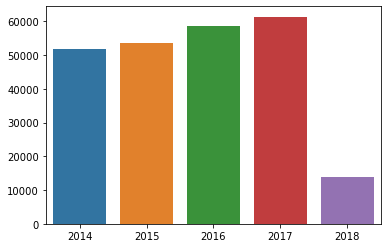

In [34]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values


x1, y1 = create_stack_bar_data('year')
x1 = x1[:-1]
y1 = y1[:-1]

sns.barplot(x=x1, y=y1, data=df);

### **Incidents per month**

**Incidents per month for every year**

In [22]:
yearly = df.groupby(['year', 'month']).aggregate({
    'month': 'count',
}).rename(columns={
    'month': 'month_count'
}).reset_index()

year_2013 = yearly[yearly['year'] == 2013]
year_2014 = yearly[yearly['year'] == 2014]
year_2015 = yearly[yearly['year'] == 2015]
year_2016 = yearly[yearly['year'] == 2016]
year_2017 = yearly[yearly['year'] == 2017]
year_2018 = yearly[yearly['year'] == 2018]

year_2013 = year_2013[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2013.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2013['month_count'], 2),
             color='month_count',
             title='year 2013')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2014 = year_2014[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2014.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2014['month_count'], 2),
             color='month_count',
             title='year 2014')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2015 = year_2015[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2015.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2015['month_count'], 2),
             color='month_count',
             title='year 2015')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2016 = year_2016[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2016.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2016['month_count'], 2),
             color='month_count',
             title='year 2016')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2017 = year_2017[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2017.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2017['month_count'], 2),
             color='month_count',
             title='year 2017')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2018 = year_2018[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2018.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2018['month_count'], 2),
             color='month_count',
             title='year 2018')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Average Incisents per year**

In [23]:
pivote_year = pd.pivot_table(
    yearly, index='month', values='month_count',
    aggfunc='mean').sort_values('month_count').reset_index()

fig = px.bar(pivote_year,
             y='month',
             x='month_count',
             text=round(pivote_year['month_count'], 2),
             color='month_count',
             title='Average incidents per year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Average number of gun violence per week**

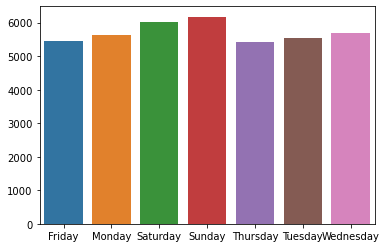

In [33]:
tempdf1 = df.groupby(['year', 'weekday']).agg({
    'weekday': 'count'
}).rename(columns={
    'weekday': 'weekday_count'
}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count': 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

wkmp = {}
for j, x in enumerate(x2):
    wkmp[x] = y2[j]

sns.barplot(x=x2, y=y2, data=df);

**number of incidents by every state**

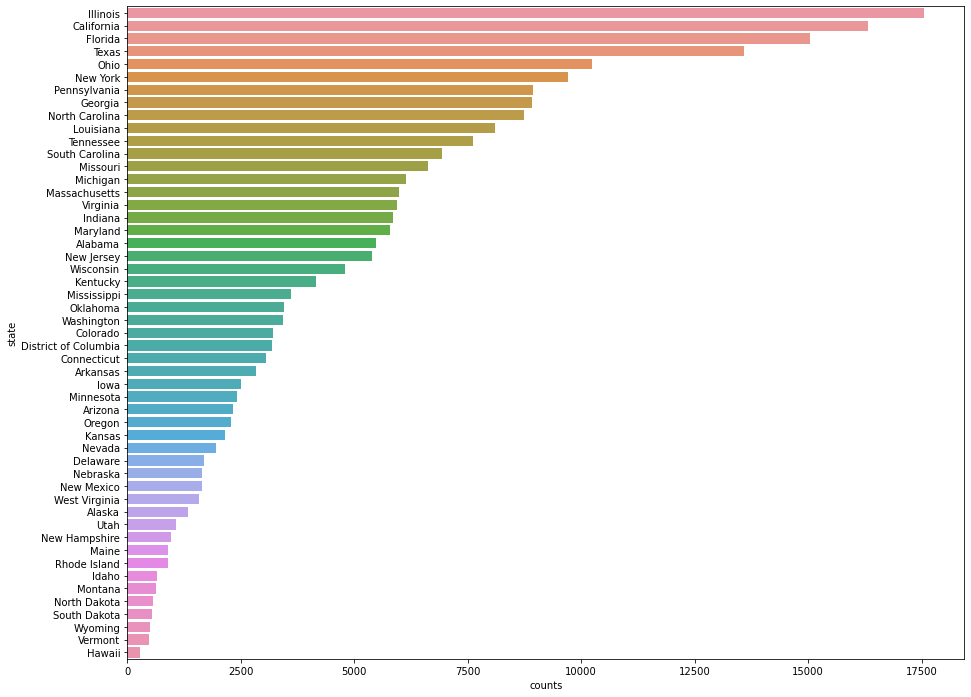

In [32]:
states_df = df['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
num_incidents_evey_state = pd.DataFrame(data=statesdf['counts'])
num_incidents_evey_state.set_index(statesdf['state'], inplace=True)
plt.figure(figsize=(15, 12))
sns.barplot(x=statesdf['counts'], y=statesdf['state']);

**Incident happend vs violence level**

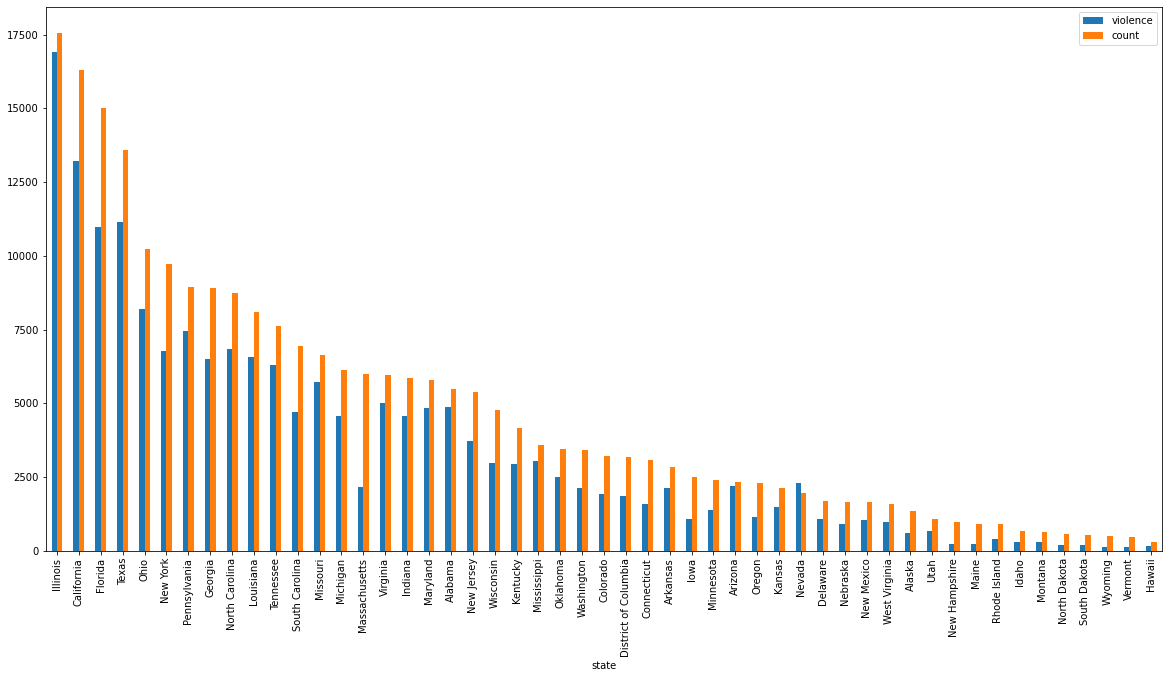

In [31]:
statdf = df.reset_index().groupby(by=['state']).agg({
    'violence': 'sum',
    'year': 'count'
}).rename(columns={'year': 'count'})
statdf['state'] = statdf.index
statdf.sort_values('count', ascending=False, inplace=True)
statdf.plot(kind='bar', figsize=(20, 10));

**Incidents per 100k by state**

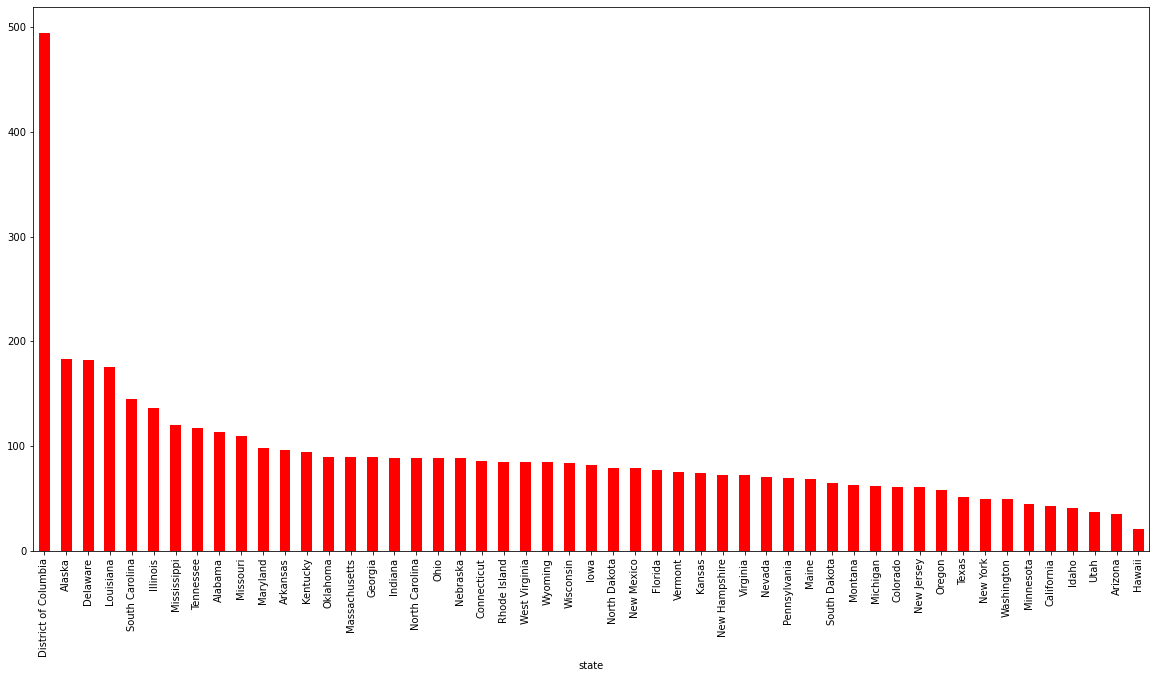

In [30]:
census_2013 = {
    'Mississippi': 2991207,
    'Iowa': 3090416,
    'Oklahoma': 3850568,
    'Delaware': 925749,
    'Minnesota': 5420380,
    'Alaska': 735132,
    'Illinois': 12882135,
    'Arkansas': 2959373,
    'New Mexico': 2085287,
    'Indiana': 6570902,
    'Maryland': 5928814,
    'Louisiana': 4625470,
    'Texas': 26448193,
    'Wyoming': 582658,
    'Arizona': 6626624,
    'Wisconsin': 5742713,
    'Michigan': 9895622,
    'Kansas': 2893957,
    'Utah': 2900872,
    'Virginia': 8260405,
    'Oregon': 3930065,
    'Connecticut': 3596080,
    'New York': 19651127,
    'California': 38332521,
    'Massachusetts': 6692824,
    'West Virginia': 1854304,
    'South Carolina': 4774839,
    'New Hampshire': 1323459,
    'Vermont': 626630,
    'Georgia': 9992167,
    'North Dakota': 723393,
    'Pennsylvania': 12773801,
    'Florida': 19552860,
    'Hawaii': 1404054,
    'Kentucky': 4395295,
    'Rhode Island': 1051511,
    'Nebraska': 1868516,
    'Missouri': 6044171,
    'Ohio': 11570808,
    'Alabama': 4833722,
    'South Dakota': 844877,
    'Colorado': 5268367,
    'Idaho': 1612136,
    'New Jersey': 8899339,
    'Washington': 6971406,
    'North Carolina': 9848060,
    'Tennessee': 6495978,
    'Montana': 1015165,
    'District of Columbia': 646449,
    'Nevada': 2790136,
    'Maine': 1328302
}
statesdf['population'] = statesdf['state'].apply(lambda x: census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(
    lambda x: float(x['counts']) * 100000 / x['population'], axis=1)
tempdf = statesdf.sort_values('incidents_per_k', ascending=False)
tempdf.set_index('state', inplace=True)
tempdf.sort_values('incidents_per_k', ascending=False, inplace=True)
tempdf['incidents_per_k'].plot(kind='bar', figsize=(20, 10), color='red');

**Common Areas of Gun Violence Incidents**

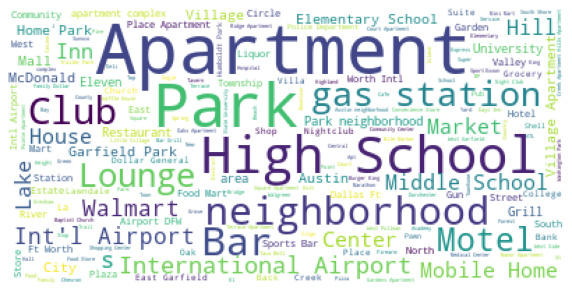

In [29]:
txt = " ".join(df['location_description'].dropna())
wc = WordCloud(max_font_size=50,
               max_words=1000,
               stopwords=STOPWORDS,
               background_color='White').generate(txt)
plt.figure(figsize=(10, 20))
plt.imshow(wc)
plt.axis('off');

In [ ]:
# Prominent Age of Gun Violence Victims

victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='brown'))
layout = dict(height=400, title='Victims Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)